# Import Lib


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# SIFT Feature Extraction




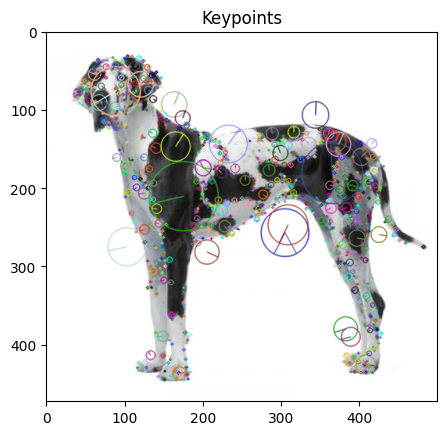

In [ ]:
# Import image
image = cv2.imread('great_dane.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# Initializ SIFT
sift = cv2.SIFT_create()


# Detect keypoints
keypoints , descriptors = sift.detectAndCompute(gray, None)

# Draw keypoints in the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.title('Keypoints')
plt.imshow(image_with_keypoints)

#  SURF Feature Extraction

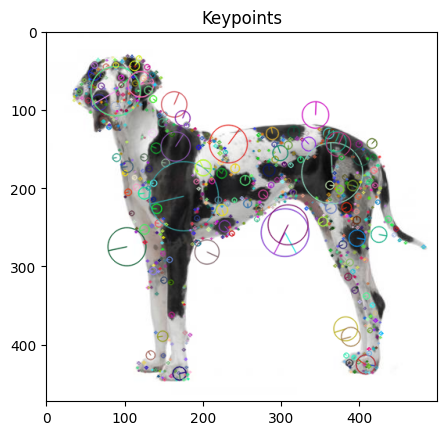

In [ ]:
# Load image
image = cv2.imread('great_dane.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
keypoints, descriptors = sift.detectAndCompute(gray, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Convert BGR to RGB for displaying in matplotlib
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Keypoints')
plt.show()


# ORB Feature Extraction

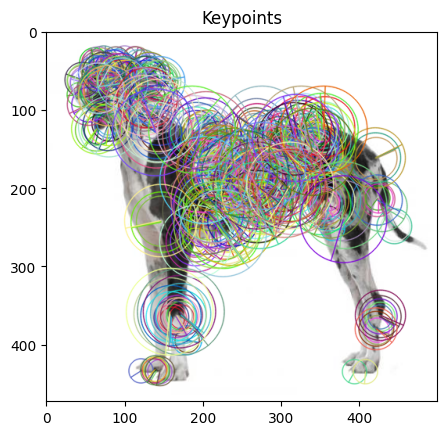

In [ ]:
# Load image
image = cv2.imread('great_dane.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect keypoints and descriptors
keypoints, descriptors = orb.detectAndCompute(gray, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Convert BGR to RGB for displaying in matplotlib
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Keypoints')
plt.show()


# Feature Matching using SIFT

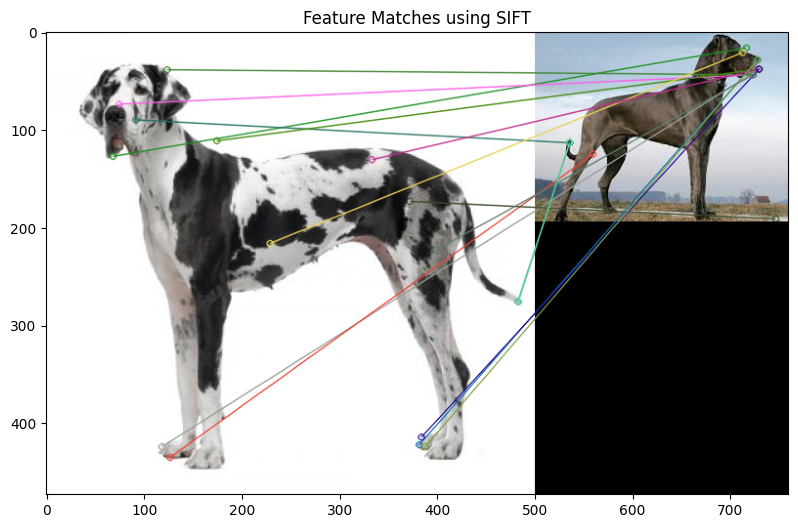

In [ ]:
# Load the images
image1 = cv2.imread('great_dane.jpg')  # First image
image2 = cv2.imread('images.jpg')  # Second image

# Convert to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)  # The number of checks

# Initialize the FLANN-based matcher
flann = cv2.FlannBasedMatcher(index_params, search_params)

# Perform the matching between descriptors
matches = flann.knnMatch(descriptors1, descriptors2, k=2)

# Apply the ratio test to get the good matches (Lowe's ratio test)
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# Draw the matches
matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Show the image with matches
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
plt.title('Feature Matches using SIFT')
plt.show()


# Real-World Applications (Image Stitching using Homography)

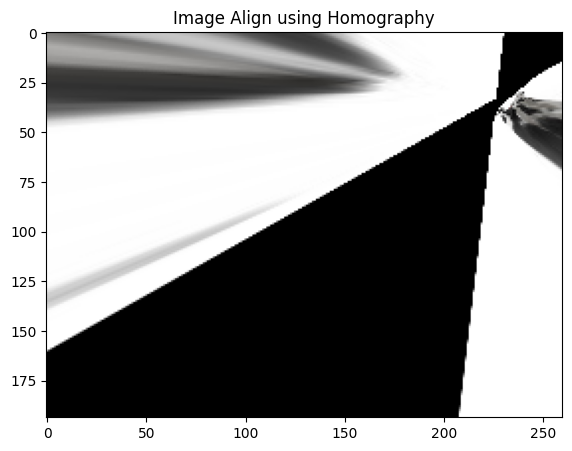

In [ ]:
# Load Image
image = cv2.imread('great_dane.jpg')
image2 = cv2.imread('images.jpg')

# Check if images loaded correctly
if image is None:
    print("Error: Could not load image 'great_dane.jpg'.")
if image2 is None:
    print("Error: Could not load image 'images.jpg'.")

# Proceed only if both images are loaded
if image is not None and image2 is not None:
    # Convert to grayscale
    gray1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Initialize SIFT detector
    sift = cv2.SIFT_create()
    keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

    # Match feature using BFMatcher
    bf = cv2.BFMatcher(cv2.NORM_L2)
    matches = bf.knnMatch(descriptors1, descriptors2, k=2)

    # Apply ratio test to filter good matches (Lowe's ratio test)
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    # Extract location of good matches
    src_pts = np.float32(
        [keypoints1[m.queryIdx].pt for m in good_matches]
    ).reshape(-1, 1, 2)
    dst_pts = np.float32(
        [keypoints2[m.trainIdx].pt for m in good_matches]
    ).reshape(-1, 1, 2)

    # Compute the homography matrix
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    # Warp image1 to align with image2
    h, w, channels = image2.shape  # Get height and width from image2
    result = cv2.warpPerspective(image, M, (w, h))

    # Show the stitched image
    plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title('Image Align using Homography')
    plt.show()
else:
    print("One or both images failed to load.")


# Combining SIFT and ORB

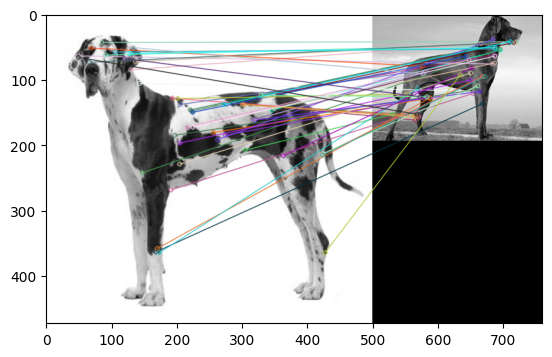

In [ ]:
# Load Image
image1 = cv2.imread('great_dane.jpg', 0)
image2 = cv2.imread('images.jpg', 0)

# SIFT detector
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

# ORB detector
orb = cv2.ORB_create()
keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

# Cross-Check Matching (BFMatcher with crossCheck=True)
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)


# Sort matches by distance
matches = sorted(matches, key=lambda x: x.distance)

plt.imshow(cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:50], image2, flags=2))
plt.show()
